In [1]:
import pandas as pd 
import zipfile 
import os.path 
import xlrd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import numpy as np
from sklearn.preprocessing import Imputer, StandardScaler


%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns

path = '../ml/data/'

In [2]:
sx ls '../ml/data/'

['2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbikeshare-tripdata.csv',
 '2017Q4-capitalbikeshare-tripdata.csv',
 'HADS GLMED Errors.xlsx',
 'HUD median incomes 1985-2009.xlsx',
 'HUDMedianIncomes1985-2009.zip',
 'HUD_median_incomes_1985-2009.xlsx',
 'HUD_median_incomes_1985-2009.xlsxHUD_median_incomes_1985-2009..csv',
 'HUD_median_incomes_1985-2009.xlsxHUD_median_incomes_1985-2009.csv',
 'ReadMe.docx',
 'data_goes_here.txt',
 'hads2011(ASCII).zip',
 'hads2013m_SAS.zip',
 'hads2013n_SAS.zip',
 'project',
 'project.zip',
 'thads2011.txt']

In [3]:
password = "housing23" # ask the instructor for the password

def unzip(filename):
    with zipfile.ZipFile(os.path.join(path, filename)) as zf:
        file_list = zf.namelist()
        zf.extractall(path=path, pwd=bytes(password, "utf-8"))


In [4]:
def xlsx_to_csv(path, filename):
    fullpath = os.path.join(path, filename)
    df_xlsx = pd.read_excel(fullpath)
    df_xlsx.to_csv(fullpath + filename[:-5] + '.csv', encoding='utf-8', index=False)
    new_path = fullpath + filename[:-5] + '.csv'
    df = pd.read_csv(new_path)
    return df

In [5]:
filename = "HUD_median_incomes_1985-2009.xlsx"
hud_income_df = xlsx_to_csv(path, filename)
hud_income_df.head(5)

,IN09_SMSA,MSA_Codebook,MSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED
0,80,"0080 Akron, OH",80,29450,31500,34800,40000,40100,41300,44300,49900,54100,60300,60700,60300.00,65000.00
1,160,"0160 Albany-Schenectady-Troy, NY",160,27450,29500,32800,37500,43800,43800,47000,49700,53000,59800,63450,63500.00,70816.67
2,200,"0200 Albuquerque, NM",200,26350,29700,32100,34600,37600,38300,44400,46100,49000,51400,54200,55900.00,59500.00
3,240,"0240 Allentown-Bethlehem-Easton, PA",240,28550,31100,33700,38600,43000,43000,45800,49400,52000,59700,60650,65800.00,70000.00
4,460,"0460 Appleton-Oshkosh-Neenah, WI",460,28650,31400,34600,40500,42400,43500,47600,53700,58000,61700,64300,66033.33,70300.00


In [131]:
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2011(ASCII).zip'
national_file = 'thads2011.txt'

z_national = urlopen(national_url)
zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
df_national_2011 = pd.read_csv(zip_national)

In [132]:
df_national_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145531 entries, 0 to 145530
Data columns (total 99 columns):
CONTROL                145531 non-null object
AGE1                   145531 non-null int64
METRO3                 145531 non-null object
REGION                 145531 non-null object
LMED                   145531 non-null int64
FMR                    145531 non-null int64
L30                    145531 non-null int64
L50                    145531 non-null int64
L80                    145531 non-null int64
IPOV                   145531 non-null int64
PER                    145531 non-null int64
ZINC2                  145531 non-null int64
ZADEQ                  145531 non-null object
ZSMHC                  145531 non-null int64
STATUS                 145531 non-null object
WEIGHT                 145531 non-null float64
BEDRMS                 145531 non-null int64
BUILT                  145531 non-null int64
TYPE                   145531 non-null int64
VALUE                  1455

In [134]:
df_national_2011.head(5)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'


In [135]:
df_national_2011['REGION_NAME'] = 'NaN'
df_national_2011.loc[df_national_2011['REGION'] == "'1'", 'REGION_NAME'] = 'Northeast'
df_national_2011.loc[df_national_2011['REGION'] == "'2'", 'REGION_NAME'] = 'Midwest'
df_national_2011.loc[df_national_2011['REGION'] == "'3'", 'REGION_NAME'] = 'South'
df_national_2011.loc[df_national_2011['REGION'] == "'4'", 'REGION_NAME'] = 'West'

df_national_2011

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS,REGION_NAME
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
5,'036000001152',42,'2','4',84200,1327,19400,32350,51700,11674,...,'6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','West','-5',West
6,'036000001153',45,'2','4',84200,2241,24950,41550,66500,18012,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','2 30 - 50% AMI','.','3 50% or More','West','-5',West
7,'036000001154',35,'2','4',84200,2241,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
8,'036000001155',50,'2','4',84200,2577,29950,49850,79800,26385,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
9,'036000001156',38,'2','4',84200,2577,32150,53550,85700,29815,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West


In [136]:
df_national_2011_copy = df_national_2011.copy()
len(df_national_2011_copy.columns)

100

In [137]:
#AGE, METRO, BUILT doesn't exist 
df_national_2011_copy = df_national_2011_copy.loc[:, df_national_2011_copy.columns.isin(['AGE', 'AGE1', 'REGION', 'REGION_NAME', 'LMED', 'GLMED', 'METRO', 'METRO3', 'FMR', 'BUILT', 'APLMED'])]
print(df_national_2011_copy.columns)

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'BUILT', 'GLMED', 'APLMED',
       'REGION_NAME'],
      dtype='object')


In [138]:
df_corr_matrix = df_national_2011_copy.corr()

In [139]:
print(df_corr_matrix)

            AGE1      LMED       FMR     BUILT     GLMED    APLMED
AGE1    1.000000  0.021761  0.087153 -0.019574  0.021761  0.408925
LMED    0.021761  1.000000  0.615924 -0.089250  1.000000  0.502939
FMR     0.087153  0.615924  1.000000  0.040470  0.615924  0.484047
BUILT  -0.019574 -0.089250  0.040470  1.000000 -0.089250  0.003730
GLMED   0.021761  1.000000  0.615924 -0.089250  1.000000  0.502939
APLMED  0.408925  0.502939  0.484047  0.003730  0.502939  1.000000


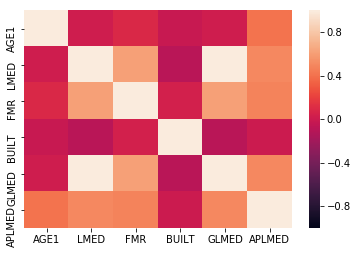

In [140]:
sns.heatmap(df_corr_matrix, vmin= -1.0, vmax = 1.0, 
            xticklabels=df_corr_matrix.columns.values,
            yticklabels=df_corr_matrix.columns.values)

In [141]:
cat_cols = df_national_2011.columns[df_national_2011.dtypes=='object']
num_cols = df_national_2011.columns[df_national_2011.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

33 categorical columns
67 numerical columns


In [142]:
df_national_2011_processed = df_national_2011.copy()
df_national_2011.drop(columns=['OWNRENT'])

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS,REGION_NAME
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
5,'036000001152',42,'2','4',84200,1327,19400,32350,51700,11674,...,'6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','West','-5',West
6,'036000001153',45,'2','4',84200,2241,24950,41550,66500,18012,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','2 30 - 50% AMI','.','3 50% or More','West','-5',West
7,'036000001154',35,'2','4',84200,2241,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
8,'036000001155',50,'2','4',84200,2577,29950,49850,79800,26385,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
9,'036000001156',38,'2','4',84200,2577,32150,53550,85700,29815,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West


In [143]:
# # Get OHE of categorical variables
df_national_2011_processed = df_national_2011_processed[:20000]
df_national_2011_processed = pd.get_dummies(df_national_2011_processed)

In [144]:
#Scale numeric features
scaler = StandardScaler()
df_national_2011_processed[num_cols] = scaler.fit_transform(df_national_2011_processed[num_cols])

In [145]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [146]:
from sklearn.decomposition import PCA

pca = PCA(8)
pca_features = pca.fit_transform(df_national_2011_processed)

In [147]:
def plot_pca(data, pca, n_compo):
    '''
    Plot the features with the most absolute variance for given pca component 
    '''
    compo = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()).iloc[n_compo-1]
    compo.sort_values(ascending=False, inplace=True)
    compo = pd.concat([compo.head(5), compo.tail(5)])
    
    compo.plot(kind='bar', color='#1f77b4', title='Component ' + str(n_compo))
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)
    ax.set_axisbelow(True)
    plt.show()

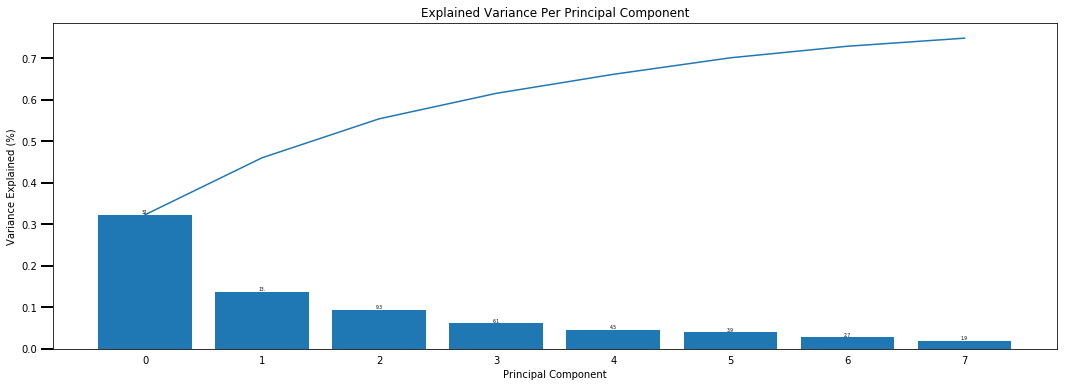

In [148]:
scree_plot(pca)

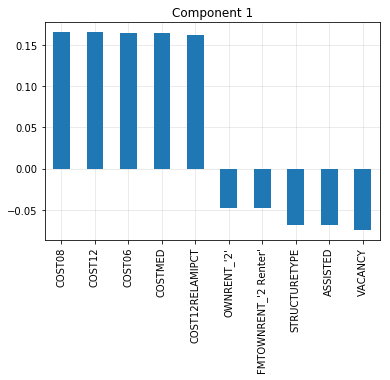

In [149]:
plot_pca(df_national_2011_processed, pca, 1)

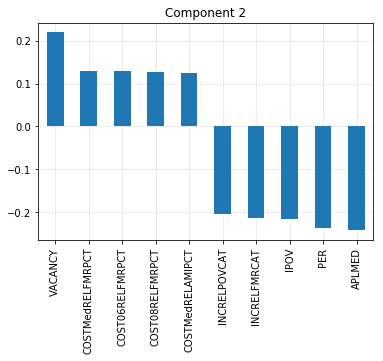

In [150]:
plot_pca(df_national_2011_processed, pca, 2)

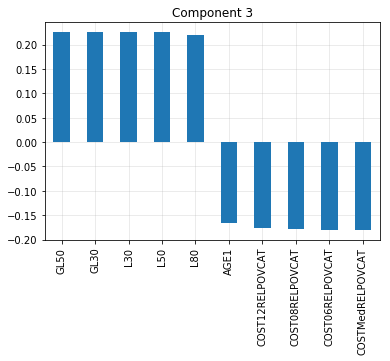

In [151]:
plot_pca(df_national_2011_processed, pca, 3)

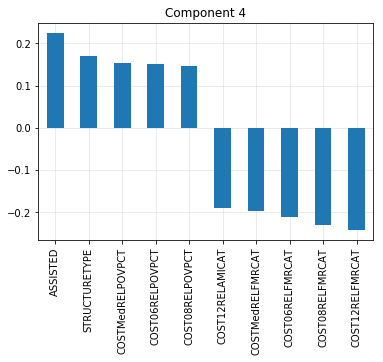

In [152]:
plot_pca(df_national_2011_processed, pca, 4)

In [153]:
df_national_2011.loc[df_national_2011['OWNRENT'] == "'1'"] = 0
df_national_2011.loc[df_national_2011['OWNRENT'] == "'2'"] = 1

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_features, df_national_2011[:20000]['OWNRENT'], test_size=0.25, random_state=42)

In [155]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/Users/jfrank/ml/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([0])

In [157]:
logisticRegr.predict(x_test[0:10])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [158]:
predictions = logisticRegr.predict(x_test)
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [159]:
score = logisticRegr.score(x_test, y_test)
score

0.9578

In [160]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[3067  107]
 [ 104 1722]]


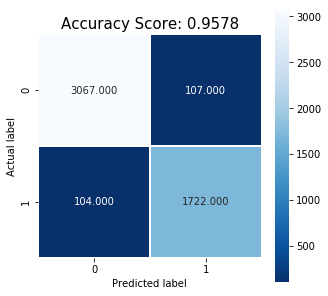

In [161]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);